# 0. Set up the environment

### Here is how we chose the tickers to use to compute our portfolio on the EU market.

1. **All EU tickers on Yahoo Finance for these exchanges:**  

```python
european_exchanges = [
    ".PA",  # Euronext Paris, France
    ".AS",  # Euronext Amsterdam, Netherlands
    ".BR",  # Euronext Brussels, Belgium
    ".LS",  # Euronext Lisbon, Portugal
    ".DE",  # Deutsche Börse / Xetra, Germany
    ".SW",  # SIX Swiss Exchange, Switzerland
    ".CO",  # Nasdaq OMX Copenhagen, Denmark
    ".HE",  # Nasdaq OMX Helsinki, Finland
    ".ST",  # Nasdaq OMX Stockholm, Sweden
    ".MI",  # Borsa Italiana, Italy
    ".OL",  # Oslo Børs, Norway
    ".MC",  # Bolsa de Madrid, Spain
    ".VI",  # Wiener Börse, Austria
    ".ID"   # Irish Stock Exchange, Ireland
]
```
Total tickers: 3,774

2. **Remove multiple listings and keep the main exchange:**      
priority = ['DE', 'PA', 'MC', 'MI', 'BR', 'AS', 'LS', 'ST', 'HE', 'CO', 'OL', 'SW', 'VI']        
Remaining tickers: 3,585

3. **Keep only tickers with data available from 01-01-2022:**      
Remaining tickers: 2,155    

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

from backtesting.core import BacktestEngine # Librairy I created available on GitHub

In [2]:
rebalancing_dates = ["01-01-2022", "01-01-2023", "01-01-2024", "01-01-2025"]

# 1. Load data     
Data needed :    
- stock prices     
- marketCap    
- PbRatio    

In [3]:
df_stock_prices = pd.read_csv(r"data\EU_tickers_StockPrices.csv", index_col=0, parse_dates=True)
df_market = pd.read_csv(r"data\Stoxx600_StockPrices.csv", index_col=0, parse_dates=True)
df_marketCap = pd.read_csv(r"data\EU_tickers_marketCap.csv", index_col=0, parse_dates=True)
df_pbRatio = pd.read_csv(r"data\EU_tickers_pbRatio.csv", index_col=0, parse_dates=True)
df_stock_prices

1COV.DE      1N8.SW      2020.OL   2CUREX.ST     2GB.DE  \
2021-01-01  50.480000  926.920156   619.053196  166.693290  22.450001   
2021-01-02  50.480000  926.920156   619.053196  166.693290  22.450001   
2021-01-03  50.480000  926.920156   619.053196  166.693290  22.450001   
2021-01-04  51.700001  923.280475   620.409793  170.799908  23.350000   
2021-01-05  51.279999  926.948630   618.195729  177.466095  23.625000   
...               ...         ...          ...         ...        ...   
2025-09-10  55.279999  901.164505  1664.322849   23.284894  34.750000   
2025-09-11  58.740002  903.575588  1667.495899   23.046359  32.349998   
2025-09-12  58.500000  903.331764  1694.791606   25.224040  32.500000   
2025-09-13  58.500000  903.331764  1694.791606   25.224040  32.500000   
2025-09-14  58.500000  903.331764  1694.791606   25.224040  32.500000   

            2HRA.DE  2SU.VI  4DS.DE     8GM.DE    8TRA.DE  ...      ZEAL.CO  \
2021-01-01     5.47    12.9    3.23  33.985001  22.605000  ...  1641.486191   
2021-01-02     5.47    12.9    3.23  33.985001  22.605000  ...  1641.486191   
2021-01-03     5.47    12.9    3.23  33.985001  22.605000  ...  1641.486191   
2021-01-04     5.57    13.4    3.33  33.060001  22.815001  ...  1669.226168   
2021-01-05     5.75    13.2    3.29  33.490002  22.690001  ...  1667.732069   
...             ...     ...     ...        ...        ...  ...          ...   
2025-09-10     4.95    13.5   12.80  48.650002  30.260000  ...  3156.617257   
2025-09-11     4.94    13.7   12.35  49.939999  30.580000  ...  3211.196244   
2025-09-12     4.93    13.7   12.10  50.349998  30.459999  ...  3076.453589   
2025-09-13     4.93    13.7   12.10  50.349998  30.459999  ...  3076.453589   
2025-09-14     4.93    13.7   12.10  50.349998  30.459999  ...  3076.453589   

               ZENI.ST  ZIL2.DE     ZOTS.VI  ZUC.MI      ZUGN.SW     ZURN.SW  \
2021-01-01  108.870260   15.840  133.059998   1.738  2201.198533  404.998843   
2021-01-02  108.870260   15.840  133.059998   1.738  2201.198533  404.998843   
2021-01-03  108.870260   15.840  133.059998   1.738  2201.198533  404.998843   
2021-01-04  103.913235   15.680  131.800003   1.740  2202.506252  404.548588   
2021-01-05  106.031762   16.260  131.899994   1.720  2171.172872  403.233237   
...                ...      ...         ...     ...          ...         ...   
2025-09-10   25.580586    4.625  128.160004   0.948  1962.908317  536.154363   
2025-09-11   27.087665    4.600  129.020004   0.948  1998.818322  532.208717   
2025-09-12   26.206797    4.610  126.120003   0.948  1998.278954  533.372413   
2025-09-13   26.206797    4.610  126.120003   0.948  1998.278954  533.372413   
2025-09-14   26.206797    4.610  126.120003   0.948  1998.278954  533.372413   

            ZV.MI      ZZ-B.ST       TCM.CO  
2021-01-01  13.68   765.479794  1034.299974  
2021-01-02  13.68   765.479794  1034.299974  
2021-01-03  13.68   765.479794  1034.299974  
2021-01-04  13.78   749.902539  1048.845348  
2021-01-05  13.86   762.149058  1026.525552  
...           ...          ...          ...  
2025-09-10   7.92  1827.809417   555.337745  
2025-09-11   8.00  1834.970842   544.903113  
2025-09-12   7.97  1764.590966   538.603160  
2025-09-13   7.97  1764.590966   538.603160  
2025-09-14   7.97  1764.590966   538.603160  

[1718 rows x 2155 columns]

# 2. Remove outliers based on stock returns 

In [4]:
def remove_outlier_columns(df, method="iqr", threshold=1.5):
    """
    Remove columns containing outliers.

    Args:
        df (pd.DataFrame): Input DataFrame.
        method (str): "iqr" or "zscore".
        threshold (float): Multiplier for outlier detection.

    Returns:
        pd.DataFrame: DataFrame without columns containing outliers.
    """
    df_clean = df.copy()

    if method == "iqr":
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1

        # Boolean mask for columns without outliers
        mask = ~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any()
        df_clean = df.loc[:, mask]

    elif method == "zscore":
        from scipy.stats import zscore
        zscores = df.apply(zscore)
        mask = ~(abs(zscores) > threshold).any()
        df_clean = df.loc[:, mask]

    else:
        raise ValueError("Method must be 'iqr' or 'zscore'")

    return df_clean


In [5]:
df_stock_prices_no_outliers = remove_outlier_columns(df_stock_prices.pct_change(), method="iqr", threshold=100)
tickers_ok = df_stock_prices_no_outliers.columns
print(f"We removed {len(df_stock_prices.columns) -len(tickers_ok)} tickers that contained outliers in their returns => probably illiquid stocks.")

We removed 198 tickers that contained outliers in their returns => probably illiquid stocks.


In [6]:
df_stock_prices = df_stock_prices[tickers_ok].copy()
df_marketCap = df_marketCap[tickers_ok].copy()
df_pbRatio = df_pbRatio[tickers_ok].copy()

# 2. Data formatting

In [7]:
def format_downloaded_data(market_cap, pb_ratio, stock_prices, rebalancing_dates):
    """
    Format downloaded data for portfolio construction.

    Args:
        market_cap (pd.DataFrame): Market capitalizations of stocks.
        pb_ratio (pd.DataFrame): Price-to-book ratios of stocks.
        stock_prices (pd.DataFrame): Stock price history.
        rebalancing_dates (list or pd.DatetimeIndex): Dates of rebalancing.

    Returns:
        dict: Formatted dataframes:
            - market_cap_reindexed
            - pb_ratio_reindexed
            - returns_factor
            - returns_daily
    """
    # Reindex market cap to rebalancing dates and replace 0 with NaN
    market_cap_reindexed = market_cap.reindex(rebalancing_dates, method='nearest').replace(0, np.nan)

    # Reindex P/B ratio and invert, replace 0 with NaN
    pb_ratio_reindexed = 1 / pb_ratio.reindex(rebalancing_dates, method='nearest').replace(0, np.nan)

    # Compute daily returns
    returns_daily = stock_prices.pct_change()

    # A chaque date de rebalancement, on regarde le return de chaque stock (depuis 1 an, jusqu'à il y a une semaine)
    returns_factor = pd.DataFrame({
        date: returns_daily.loc[date - pd.Timedelta(days=365): date - pd.Timedelta(days=7)].sum()
        for date in rebalancing_dates
    }).T

    return {
        "market_cap_reindexed": market_cap_reindexed,
        "pb_ratio_reindexed": pb_ratio_reindexed,
        "returns_factor": returns_factor,
        "returns_daily": returns_daily
    }

In [8]:
rebalancing_dates = [pd.to_datetime(i) for i in rebalancing_dates]
formatted_data = format_downloaded_data(df_marketCap, df_pbRatio, df_stock_prices, rebalancing_dates)

market_cap_reindexed = formatted_data["market_cap_reindexed"]
pb_ratio_reindexed = formatted_data["pb_ratio_reindexed"]
returns_factor = formatted_data["returns_factor"]
returns_daily = formatted_data["returns_daily"]
market_cap_reindexed

1COV.DE       2020.OL        2GB.DE       2HRA.DE  \
2022-01-01  9.403192e+09  2.235456e+10  1.077377e+08  2.305311e+08   
2023-01-01  6.971905e+09  2.136856e+10  4.032324e+08  2.161273e+08   
2024-01-01  9.031846e+09  2.992584e+10  3.656287e+08  1.598847e+08   
2025-01-01  1.026763e+10  3.545568e+10  4.429002e+08  1.303214e+08   

                  2SU.VI        4DS.DE        8GM.DE       8TRA.DE  \
2022-01-01  5.564648e+08  2.727359e+07  7.024834e+10  9.918494e+09   
2023-01-01  4.128308e+08  4.159349e+07  4.361725e+10  6.761746e+09   
2024-01-01  2.805851e+08  5.142959e+07  4.138444e+10  9.678449e+09   
2025-01-01  4.119740e+08  5.526956e+07  5.450771e+10  1.373171e+10   

                  A1G.DE       A1OS.DE  ...       ZEAL.CO       ZENI.ST  \
2022-01-01  9.585761e+09  3.164925e+08  ...  4.214455e+10  1.298020e+09   
2023-01-01  7.639272e+09  2.122936e+08  ...  7.172773e+10  1.059675e+09   
2024-01-01  7.386097e+09  2.094472e+08  ...  1.414385e+11  1.840521e+08   
2025-01-01  1.084276e+10  2.893654e+08  ...  3.736252e+11  1.779428e+08   

                 ZIL2.DE       ZOTS.VI        ZUC.MI       ZUGN.SW  \
2022-01-01  6.553374e+08  8.677836e+10  8.315249e+07  1.757573e+09   
2023-01-01  4.233805e+08  6.083804e+10  6.216506e+07  1.563108e+09   
2024-01-01  3.242770e+08  7.536189e+10  5.162783e+07  1.295307e+09   
2025-01-01  2.594697e+08  7.029210e+10  3.774530e+07  1.754453e+09   

                 ZURN.SW         ZV.MI       ZZ-B.ST        TCM.CO  
2022-01-01  5.544737e+10  1.314328e+09  1.784873e+10  9.749587e+09  
2023-01-01  6.052891e+10  1.187306e+09  9.199120e+09  4.610443e+09  
2024-01-01  5.426018e+10  1.154028e+09  2.147506e+10  3.250483e+09  
2025-01-01  7.007500e+10  8.239271e+08  3.867236e+10  4.990718e+09  

[4 rows x 1957 columns]

# 3. For each rebalancing dates, we filter our stock universe

The function filters the universe of tickers, keeping only those whose annualized volatility remains below **1** for at least **80%** of the time over a **30-day** rolling window and that exhibit **actual price movements** (non-zero daily returns).

In [9]:
# TODO: possible look-ahead bias since we filter using the vol of the period
def filter_ticker_universe(returns_df, rebalancing_dates_with_end_date, volatility_threshold=1, min_accepted_ratio=0.8, rolling_window=30):
    """
    Define the universe of available tickers at each rebalancing date based on certain criteria.
    
    Here we filter out highly volatile tickers or those with near-zero movement.

    Args:
        returns_df (pd.DataFrame): Daily returns of stocks (indexed by date).
        rebalancing_dates_with_end_date (list or pd.DatetimeIndex): Rebalancing dates.
        volatility_threshold (float): Maximum annualized volatility allowed (default=1).
        min_accepted_ratio (float): Minimum fraction of time the volatility condition must be satisfied (default=0.8).
        rolling_window (int): Rolling window size in days for volatility calculation (default=30).

    Returns:
        dict: Mapping from each rebalancing date to the list of tickers satisfying the filter.
    """
    ticker_universe_dict = {}

    for i in range(len(rebalancing_dates_with_end_date) - 1):
        # Select returns up to the current rebalancing date
        returns_period = returns_df.loc[:rebalancing_dates_with_end_date[i]]

        # Compute rolling standard deviation over the window
        rolling_std = returns_period.rolling(rolling_window).std()

        # Annualize volatility and check the conditions
        stdev_accepted_ratio = (((rolling_std * (252**0.5)) < volatility_threshold) & (rolling_std != 0)).sum() / rolling_std.count()

        # Keep only tickers that meet the condition for at least min_accepted_ratio of the time
        tickers_selected = stdev_accepted_ratio[stdev_accepted_ratio >= min_accepted_ratio].index.to_list()

        ticker_universe_dict[rebalancing_dates_with_end_date[i]] = tickers_selected

    return ticker_universe_dict


In [10]:
rebalancing_dates_with_end_date = rebalancing_dates + [df_stock_prices.index.max()]

ticker_universe = filter_ticker_universe(
    returns_df=returns_daily,
    rebalancing_dates_with_end_date=rebalancing_dates_with_end_date,
    volatility_threshold=1,
    min_accepted_ratio=0.8,
    rolling_window=30
)
pd.Series(ticker_universe).to_frame("tickers")

tickers
2022-01-01  [1COV.DE, 2020.OL, 2GB.DE, 2HRA.DE, 2SU.VI, 4D...
2023-01-01  [1COV.DE, 2020.OL, 2GB.DE, 2HRA.DE, 2SU.VI, 4D...
2024-01-01  [1COV.DE, 2020.OL, 2GB.DE, 2HRA.DE, 2SU.VI, 4D...
2025-01-01  [1COV.DE, 2020.OL, 2GB.DE, 2HRA.DE, 2SU.VI, 4D...

# 4. Creation of the portfolios

In [11]:
def compute_sub_portfolios(market_cap_reindexed, ticker_universe_dict, pb_ratio_reindexed, returns_factor):
    """
    Compute sub-portfolios at each rebalancing date.

    Args:
        market_cap_reindexed (pd.DataFrame)
        ticker_universe_dict (dict): Mapping rebalancing_date -> list of tickers
        pb_ratio_reindexed (pd.DataFrame)
        returns_factor (pd.DataFrame)

    Returns:
        dict: Sub-portfolio compositions:
            SV, SG, SM, BV, BG, BM, SW, SL, BW, BL
    """
    # Utility functions
    def get_tickers_above_percentile(row, percentile):
        threshold = row.quantile(percentile)
        return row[(row > threshold) & (row.notna())].index.tolist()

    def get_tickers_below_percentile(row, percentile):
        threshold = row.quantile(percentile)
        return row[(row < threshold) & (row.notna())].index.tolist()

    def get_tickers_between_percentiles(row, lower_percentile, upper_percentile):
        lower = row.quantile(lower_percentile)
        upper = row.quantile(upper_percentile)
        return row[(row > lower) & (row < upper) & (row.notna())].index.tolist()

    def construct_subportfolio(tickers_portfolio, df_criteria, lower_percentile, upper_percentile):
        df_sub = df_criteria.apply(
            lambda row: row.where(row.index.isin(tickers_portfolio.loc[row.name]), np.nan),
            axis=1
        )
        sub_above = df_sub.apply(get_tickers_above_percentile, axis=1, percentile=upper_percentile)
        sub_below = df_sub.apply(get_tickers_below_percentile, axis=1, percentile=lower_percentile)
        sub_between = df_sub.apply(
            get_tickers_between_percentiles, axis=1, lower_percentile=lower_percentile, upper_percentile=upper_percentile
        )
        return sub_above, sub_below, sub_between

    # Filter market cap by universe
    market_cap_filtered = market_cap_reindexed.apply(
        lambda row: row.where(row.index.isin(ticker_universe_dict[row.name]), np.nan),
        axis=1
    )

    # Determine big and small portfolios by 80th percentile
    percentile_big_small = 0.8
    big_portfolio = market_cap_filtered.apply(get_tickers_above_percentile, axis=1, percentile=percentile_big_small)
    small_portfolio = market_cap_filtered.apply(get_tickers_below_percentile, axis=1, percentile=percentile_big_small)

    # Construct sub-portfolios
    SV, SG, SM = construct_subportfolio(small_portfolio, pb_ratio_reindexed, lower_percentile=0.3, upper_percentile=0.7)
    BV, BG, BM = construct_subportfolio(big_portfolio, pb_ratio_reindexed, lower_percentile=0.3, upper_percentile=0.7)
    SW, SL, _ = construct_subportfolio(small_portfolio, returns_factor, lower_percentile=0.1, upper_percentile=0.9)
    BW, BL, _ = construct_subportfolio(big_portfolio, returns_factor, lower_percentile=0.1, upper_percentile=0.9)

    return {
        "SV": SV, "SG": SG, "SM": SM,
        "BV": BV, "BG": BG, "BM": BM,
        "SW": SW, "SL": SL, "BW": BW, "BL": BL
    }


def compute_factor_portfolios(sub_portfolios):
    """
    Construct factor portfolios (Small, Big, Value, Growth, Winners, Losers).

    Args:
        sub_portfolios (dict): Output of compute_sub_portfolios

    Returns:
        dict: Factor portfolios
    """
    Small = pd.concat([sub_portfolios["SG"], sub_portfolios["SV"], sub_portfolios["SM"]], axis=1).apply(lambda row: sum(row, []), axis=1)
    Big = pd.concat([sub_portfolios["BG"], sub_portfolios["BV"], sub_portfolios["BM"]], axis=1).apply(lambda row: sum(row, []), axis=1)
    Value = pd.concat([sub_portfolios["SV"], sub_portfolios["BV"]], axis=1).apply(lambda row: sum(row, []), axis=1)
    Growth = pd.concat([sub_portfolios["SG"], sub_portfolios["BG"]], axis=1).apply(lambda row: sum(row, []), axis=1)
    Winners = pd.concat([sub_portfolios["SW"], sub_portfolios["BW"]], axis=1).apply(lambda row: sum(row, []), axis=1)
    Losers = pd.concat([sub_portfolios["SL"], sub_portfolios["BL"]], axis=1).apply(lambda row: sum(row, []), axis=1)

    return {
        "Small": Small,
        "Big": Big,
        "Value": Value,
        "Growth": Growth,
        "Winners": Winners,
        "Losers": Losers
    }

In [12]:
sub_portfolios = compute_sub_portfolios(market_cap_reindexed, ticker_universe, pb_ratio_reindexed, returns_factor)
factor_portfolios = compute_factor_portfolios(sub_portfolios)
pd.DataFrame(factor_portfolios)

Small  \
2022-01-01  [2020.OL, A1G.DE, AAL.VI, AB.PA, ABSO.ST, ACAR...   
2023-01-01  [2020.OL, A1G.DE, AAB.CO, AAL.VI, AB.PA, ABNX....   
2024-01-01  [2020.OL, A1G.DE, AAB.CO, AAL.VI, AB.PA, ABSO....   
2025-01-01  [2020.OL, A1G.DE, AAB.CO, AAL.VI, AB.PA, ABNX....   

                                                          Big  \
2022-01-01  [AAC.ST, ABB.ST, AEC.ST, AFG.OL, AFK.OL, ALDBT...   
2023-01-01  [AAC.ST, ABB.ST, AEC.ST, AERO.ST, AFG.OL, AFK....   
2024-01-01  [AAK.ST, AAPL.VI, ABB.ST, AERO.ST, AFG.OL, ALF...   
2025-01-01  [AAK.ST, AAPL.VI, ABB.ST, ABBV.VI, AFG.OL, ALF...   

                                                        Value  \
2022-01-01  [1COV.DE, 2GB.DE, 2HRA.DE, 2SU.VI, 8TRA.DE, A2...   
2023-01-01  [1COV.DE, 2HRA.DE, 2SU.VI, 8GM.DE, 8TRA.DE, A2...   
2024-01-01  [2HRA.DE, 2SU.VI, 8GM.DE, 8TRA.DE, A3M.MC, A7A...   
2025-01-01  [2HRA.DE, 2SU.VI, 8GM.DE, 8TRA.DE, AAG.DE, ABE...   

                                                       Growth  \
2022-01-01  [2020.OL, A1G.DE, AAL.VI, AB.PA, ABSO.ST, ACAR...   
2023-01-01  [2020.OL, A1G.DE, AAB.CO, AAL.VI, AB.PA, ABNX....   
2024-01-01  [2020.OL, A1G.DE, AAB.CO, AAL.VI, AB.PA, ABSO....   
2025-01-01  [2020.OL, A1G.DE, AAB.CO, AAL.VI, AB.PA, ABNX....   

                                                      Winners  \
2022-01-01  [2020.OL, ABTG.MI, ACCON.ST, ADDV-B.ST, ADN1.D...   
2023-01-01  [4DS.DE, AAB.CO, ACG1V.HE, ADM.DE, AEVS.SW, AF...   
2024-01-01  [1COV.DE, 8TRA.DE, A2A.MI, AAG.DE, ACT.DE, ADD...   
2025-01-01  [8GM.DE, ACARIX.ST, ACT.DE, ADE.DE, ADVE.ST, A...   

                                                       Losers  
2022-01-01  [AB.PA, ADE.DE, ADEN.SW, ADJ.DE, ADMCM.HE, ADX...  
2023-01-01  [ADJ.DE, ADOC.PA, ADXN.SW, AEF.MI, ALBPS.PA, A...  
2024-01-01  [AB.PA, ACCON.ST, ACG1V.HE, ADJ.DE, AEC.ST, AG...  
2025-01-01  [AAG.DE, AB.PA, ACCON.ST, ACROUD.ST, ADDV-B.ST...

# 5. Compute portfolio returns

## a) We calculate the SMB, HML, WML portfolios

In [13]:
def compute_portfolio_returns(returns_df, portfolio_compositions, rebalancing_dates_with_end_date):
    """
    Compute cumulative returns of multiple portfolios.

    Args:
        returns_df (pd.DataFrame): Daily returns of all stocks.
        portfolio_compositions (dict): Dictionary mapping portfolio names to their composition DataFrames 
                                       (index = rebalancing dates, values = list of tickers).
        rebalancing_dates_with_end_date (list or pd.DatetimeIndex): Rebalancing dates.

    Returns:
        dict: Dictionary mapping portfolio names to Series of cumulative portfolio returns.
    """
    
    def calculate_returns_for_single_portfolio(portfolio_compo, returns_df):
        """
        Calculate cumulative returns for a single portfolio.

        Args:
            portfolio_compo (pd.DataFrame): Portfolio composition for each rebalancing date (index = rebalancing dates, values = list of tickers).
            returns_df (pd.DataFrame): Daily returns of all tickers.
            rebalancing_dates_with_end_date (list or pd.DatetimeIndex): List of rebalancing dates including the last end date.

        Returns:
            pd.Series: Cumulative returns of the portfolio.
        """
        returns_list = []

        for i in range(len(rebalancing_dates_with_end_date) - 1):
            # Filter daily returns for the current rebalancing period
            start_date = rebalancing_dates_with_end_date[i]
            end_date = rebalancing_dates_with_end_date[i + 1]
            period_returns_df = returns_df.loc[start_date:end_date]

            # Select tickers in the portfolio for this period
            tickers_period = portfolio_compo.loc[start_date]

            # Filter the returns to keep only the portfolio tickers
            if tickers_period:
                period_returns_df = period_returns_df.loc[:, tickers_period].fillna(0)
            else:
                # If no tickers, create a zero DataFrame of the same shape
                period_returns_df = pd.DataFrame(0, index=period_returns_df.index, columns=[0])

            # Equally-weighted portfolio return for this period
            
            period_portfolio_cum_returns = (1 + period_returns_df).cumprod().mean(axis=1)
            period_portfolio_returns = period_portfolio_cum_returns.pct_change()
            period_portfolio_returns.fillna(0, inplace=True)
            returns_list.append(period_portfolio_returns)

        # Concatenate all periods and compute cumulative product
        all_periods_returns = pd.concat(returns_list)
        all_periods_cum_returns = (1 + all_periods_returns).cumprod() - 1

        return all_periods_cum_returns

    # Compute returns for all portfolios
    portfolio_returns = {}
    for portfolio_name, portfolio_compo in portfolio_compositions.items():
        portfolio_returns[portfolio_name] = calculate_returns_for_single_portfolio(portfolio_compo, returns_df)

    return portfolio_returns


def compute_factor_portfolios(portfolio_returns):
    """
    Compute factor portfolios (SMB, HML, WML) from portfolio returns.

    Args:
        portfolio_returns (dict): Dictionary of portfolio cumulative returns (output of compute_portfolio_returns)

    Returns:
        pd.DataFrame: DataFrame containing factor portfolio returns.
    """
    df_factor_returns = pd.DataFrame()
    df_factor_returns["SMB"] = 1 + portfolio_returns["Small"] - portfolio_returns["Big"]
    df_factor_returns["HML"] = 1 + portfolio_returns["Value"] - portfolio_returns["Growth"]
    df_factor_returns["WML"] = 1 + portfolio_returns["Winners"] - portfolio_returns["Losers"]

    return df_factor_returns

In [14]:
# Compute portfolio returns
portfolio_returns = compute_portfolio_returns(returns_daily, factor_portfolios, rebalancing_dates_with_end_date)

# Compute factor portfolios (SMB, HML, WML)
factor_returns = compute_factor_portfolios(portfolio_returns)
factor_returns

SMB       HML       WML
2022-01-01  1.000000  1.000000  1.000000
2022-01-02  1.000000  1.000000  1.000000
2022-01-03  1.003898  0.995722  0.983102
2022-01-04  1.007384  1.007290  0.981344
2022-01-05  1.008486  1.010091  0.984207
...              ...       ...       ...
2025-09-10  0.887872  1.312035  1.308087
2025-09-11  0.887349  1.321334  1.305858
2025-09-12  0.888512  1.320979  1.307041
2025-09-13  0.888512  1.320979  1.307041
2025-09-14  0.888512  1.320979  1.307041

[1356 rows x 3 columns]

## b) We add the market factor

In [15]:
# Compute cumulative market return
df_market_returns = df_market.ffill().reindex(factor_returns.index).pct_change().fillna(0)
df_market_cum_returns = (df_market_returns + 1).cumprod()

df_final = pd.concat([factor_returns, df_market_cum_returns], axis=1)
df_final

SMB       HML       WML    ^STOXX
2022-01-01  1.000000  1.000000  1.000000  1.000000
2022-01-02  1.000000  1.000000  1.000000  1.000000
2022-01-03  1.003898  0.995722  0.983102  1.002619
2022-01-04  1.007384  1.007290  0.981344  1.010865
2022-01-05  1.008486  1.010091  0.984207  1.011541
...              ...       ...       ...       ...
2025-09-10  0.887872  1.312035  1.308087  1.130098
2025-09-11  0.887349  1.321334  1.305858  1.136318
2025-09-12  0.888512  1.320979  1.307041  1.135315
2025-09-13  0.888512  1.320979  1.307041  1.135315
2025-09-14  0.888512  1.320979  1.307041  1.135315

[1356 rows x 4 columns]

# 7. Backtesting

In [16]:
def format_df_for_bt(df_port) :
    # reset index pour avoir la colonne date
    df_long = df_port.reset_index().explode(0)
    df_long.columns = ['Date', 'Symbol']  # renommer les colonnes

    # On ajoute le prix de l'action à cette date pour ce ticker
    df_long['price'] = df_long.apply(lambda row: df_stock_prices.loc[row['Date'], row['Symbol']], axis=1)

    # investissement total par date
    total_investment = 1_000_000

    # compter le nombre de tickers par date
    df_long['n_tickers'] = df_long.groupby('Date')['Symbol'].transform('count')

    # investissement par ticker
    df_long['investment_per_ticker'] = total_investment / df_long['n_tickers']

    # calcul du volume = investissement / prix
    df_long['Volume'] = df_long['investment_per_ticker'] / df_long['price']

    # si tu veux, tu peux garder uniquement les colonnes utiles
    df_long = df_long[['Date', 'Symbol', 'Volume']]
    return df_long


def generate_close_position_df(df_bt, order_type) :
    liste_dates = list(set(df_bt['Date']))
    liste_dates.sort()
    df_close_position = pd.DataFrame()
    for k, i in enumerate(liste_dates[:-1]) :
        new_df = pd.DataFrame()
        new_df["Symbol"] = df_bt[df_bt['Date'] == i]["Symbol"]
        new_df['Date'] = liste_dates[k+1]
        new_df["Volume"] = df_bt[df_bt['Date'] == i]["Volume"]
        new_df["Type"] = order_type
        df_close_position = pd.concat([df_close_position, new_df])

    return df_close_position

def aggr_volume(df_input) :
    df = df_input.copy()
    # Example: create Flow column
    df["Flow"] = df["Volume"] * np.where(df["Type"] == "Buy", 1, -1)

    # Aggregate Flow by Date and Symbol
    grouped_df = df.groupby(["Date", "Symbol"], as_index=False)["Flow"].sum()
    grouped_df["Type"] = np.where(grouped_df["Flow"] < 0, "Sell", "Buy")
    grouped_df["Volume"] = grouped_df["Flow"].abs()
    grouped_df.drop(columns=["Flow"], inplace=True)
    return grouped_df

In [17]:
df_port = factor_portfolios["Small"]
bt_small = format_df_for_bt(df_port)

df_port = factor_portfolios["Big"]
bt_big = format_df_for_bt(df_port)

df_port = factor_portfolios["Growth"]
bt_growth = format_df_for_bt(df_port)

df_port = factor_portfolios["Value"]
bt_value = format_df_for_bt(df_port)

df_port = factor_portfolios["Winners"]
bt_winners = format_df_for_bt(df_port)

df_port = factor_portfolios["Losers"]
bt_losers = format_df_for_bt(df_port)

bt_small

Date   Symbol     Volume
0  2022-01-01  2020.OL   0.577149
0  2022-01-01   A1G.DE  40.636346
0  2022-01-01   AAL.VI  40.564713
0  2022-01-01    AB.PA  53.694158
0  2022-01-01  ABSO.ST   0.137612
..        ...      ...        ...
3  2025-01-01  XRAY.VI  35.971587
3  2025-01-01  YELP.VI  17.599685
3  2025-01-01   ZAL.DE  19.727943
3  2025-01-01  ZUGN.SW   0.336129
3  2025-01-01    ZV.MI  68.900896

[6196 rows x 3 columns]

In [18]:
bt_small["Type"] = "Buy"
bt_big["Type"] = "Sell"
bt_small_close = generate_close_position_df(bt_small, "Sell")
bt_big_close = generate_close_position_df(bt_big, "Buy")
SMB_bt = pd.concat([bt_small, bt_big, bt_small_close, bt_big_close])
SMB_bt = aggr_volume(SMB_bt)

bt_value["Type"] = "Buy"
bt_growth["Type"] = "Sell"
bt_value_close = generate_close_position_df(bt_value, "Sell")
bt_growth_close = generate_close_position_df(bt_growth, "Buy")
HML_bt = pd.concat([bt_growth, bt_value, bt_value_close, bt_growth_close])
HML_bt = aggr_volume(HML_bt)

bt_winners["Type"] = "Buy"
bt_losers["Type"] = "Sell"
bt_winners_close = generate_close_position_df(bt_winners, "Sell")
bt_losers_close = generate_close_position_df(bt_losers, "Buy")
WML_bt = pd.concat([bt_winners, bt_losers, bt_winners_close, bt_losers_close])
WML_bt = aggr_volume(WML_bt)

SMB_bt

Date   Symbol  Type      Volume
0    2022-01-01  1COV.DE   Buy   11.888005
1    2022-01-01  2020.OL   Buy    0.577149
2    2022-01-01   2GB.DE   Buy   24.974028
3    2022-01-01  2HRA.DE   Buy   91.784886
4    2022-01-01   2SU.VI   Buy   48.084322
...         ...      ...   ...         ...
7768 2025-01-01   ZUC.MI   Buy  136.413854
7769 2025-01-01  ZUGN.SW  Sell    0.095057
7770 2025-01-01  ZURN.SW  Sell    6.689822
7771 2025-01-01    ZV.MI   Buy   23.599716
7772 2025-01-01  ZZ-B.ST  Sell    0.314758

[7773 rows x 4 columns]

In [19]:
dic_launch_bt = {
    "SMB": SMB_bt,
    "HML": HML_bt,
    "WML": WML_bt
}

dic_results_bt = {}
dic_strat_pnl = {}
dic_breakdown = {}
for nameStrat, df_strat in dic_launch_bt.items() :
    engine = BacktestEngine(df_strat, df_stock_prices, close_all=True)
    engine.run()
    dic_results_bt[nameStrat] = engine.summary()
    dic_strat_pnl[nameStrat] = engine.cumulative_pnl_portfolio
    dic_breakdown[nameStrat] = engine.dic_winners_losers_long_short


Stock prices dataframe check passed.
Consistency check passed.
Stock prices dataframe check passed.
Consistency check passed.
Stock prices dataframe check passed.
Consistency check passed.


In [20]:
df_results_comp = pd.DataFrame(dic_results_bt)
df_results_comp

SMB            HML            WML
sharpe_ratio                        -0.620000       0.860000      -0.250000
sortino_ratio                       -0.620000       1.440000      -0.260000
calmar_ratio                        -0.310000       0.010000      -0.060000
max_cash_needed                 628939.460000  305303.580000  273061.480000
total_profit                   -160566.820000  269172.580000  343667.750000
total_return                        -0.255300       0.881700       1.258600
volatility                          53.479400       0.286900      28.355200
max_drawdown                         0.429100       0.163100       0.476800
average_transac_day               1906.800000    1244.000000     556.200000
max_nb_transac_day                1949.000000    1324.000000     654.000000
nb_transacs_total                 9534.000000    6220.000000    2781.000000
daily_portfolio_average_return      -0.130900       0.001100      -0.027900
Hit_ratio                            0.520775       0.543525       0.610196
Winner_median                        0.346264       0.307746       0.334800
Loser_median                        -0.257083      -0.262528      -0.205000
Avg_profit_per_ops                   0.295453       0.059434       0.187392

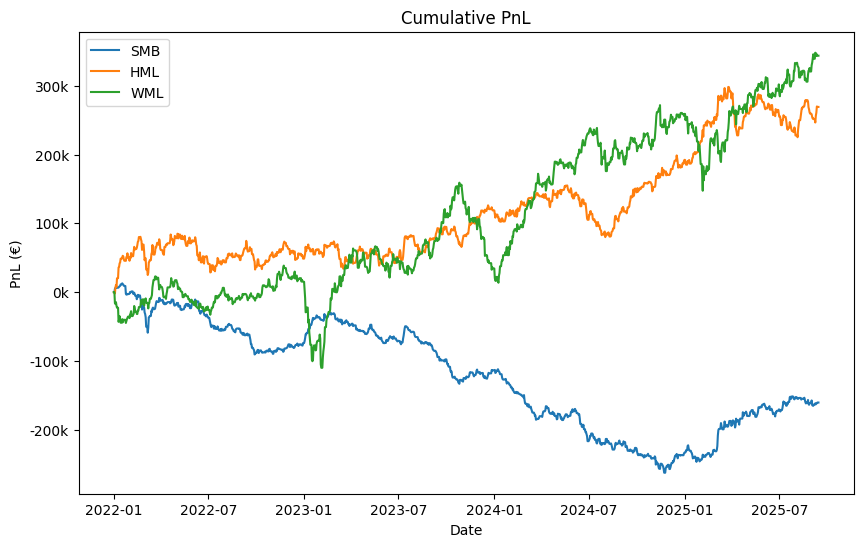

In [ ]:


# Fonction pour formater les valeurs en "k"
def thousands(x, pos):
    return f'{int(x/1000)}k'

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer chaque stratégie
for nameStrat, stratPnL in dic_strat_pnl.items():
    plt.plot(stratPnL.index, stratPnL.values, label=nameStrat)

# Titres et labels
plt.title("Cumulative PnL")
plt.xlabel("Date")
plt.ylabel("PnL (€)")

# Formatter l'axe Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

# Légende
plt.legend()

# Afficher le graphique
plt.show()


In [28]:
# fig = go.Figure()
# for nameStrat, stratPnL in dic_strat_pnl.items() :
#     fig.add_trace(go.Scatter(
#         x=stratPnL.index,
#         y=stratPnL.values,
#         name=f"PnL {nameStrat}"
#     ))
# fig.update_layout(
#     title="Cumulative PnL",
#     xaxis_title="Date",
#     yaxis_title="PnL (€)",
#     template="plotly_white",
#     hovermode="x unified"
# )

# fig.show()

In [29]:
df_win_rate_breakdown = pd.DataFrame(dic_breakdown)
df_win_rate_breakdown

SMB  HML  WML
Long - Gagnants   1540  843  392
Long - Perdants   1110  512  344
Short - Gagnants   127  412  386
Short - Perdants   424  542  153

# 8. Backtesting conclusion

## a) SMB portfolios

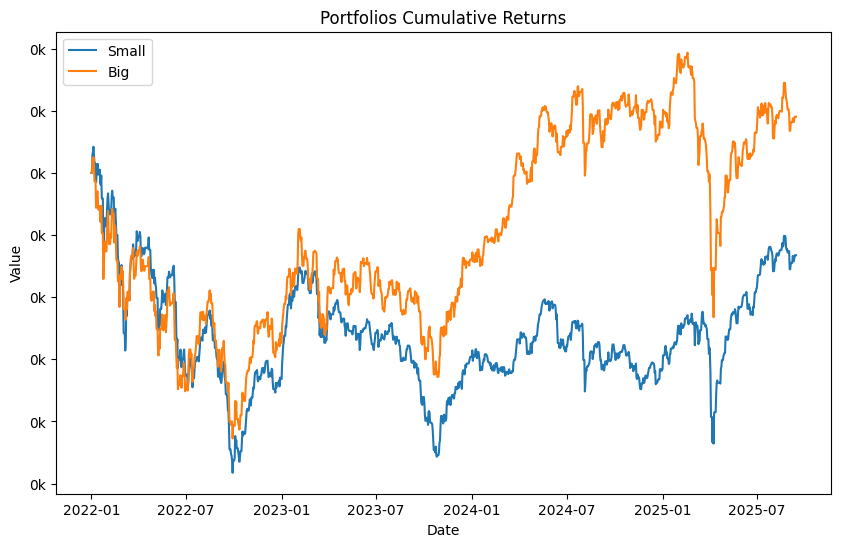

In [37]:
dff = pd.DataFrame(portfolio_returns)[["Small", "Big"]]

# Fonction pour formater les valeurs en "k"
def thousands(x, pos):
    return f'{int(x/1000)}k'

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer chaque stratégie
plt.plot(dff.index, dff.values, label=dff.columns)

# Titres et labels
plt.title("Portfolios Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Value")

# Formatter l'axe Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

# Légende
plt.legend()

# Afficher le graphique
plt.show()


In [38]:
# dff = pd.DataFrame(portfolio_returns)[["Small", "Big"]]
# import plotly.express as px

# fig = px.line(dff, x=dff.index, y=dff.columns,
#               title="Portfolio and Market Cumulative Returns")
# fig.show()


## b) HML portfolio

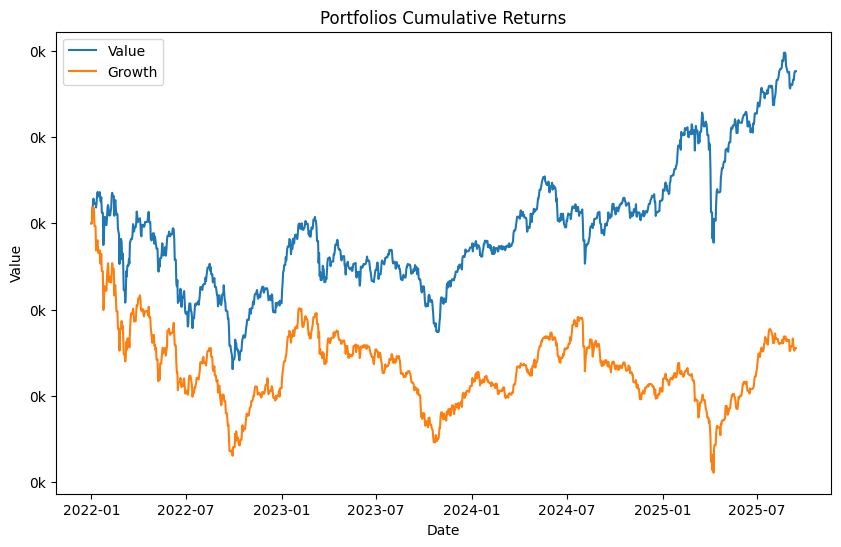

In [39]:
dff = pd.DataFrame(portfolio_returns)[["Value", "Growth"]]

# Fonction pour formater les valeurs en "k"
def thousands(x, pos):
    return f'{int(x/1000)}k'

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer chaque stratégie
plt.plot(dff.index, dff.values, label=dff.columns)

# Titres et labels
plt.title("Portfolios Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Value")

# Formatter l'axe Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

# Légende
plt.legend()

# Afficher le graphique
plt.show()


In [40]:
# dff = pd.DataFrame(portfolio_returns)[["Value", "Growth"]]

# fig = px.line(dff, x=dff.index, y=dff.columns,
#               title="Portfolio and Market Cumulative Returns")
# fig.show()


## c) WML portfolio

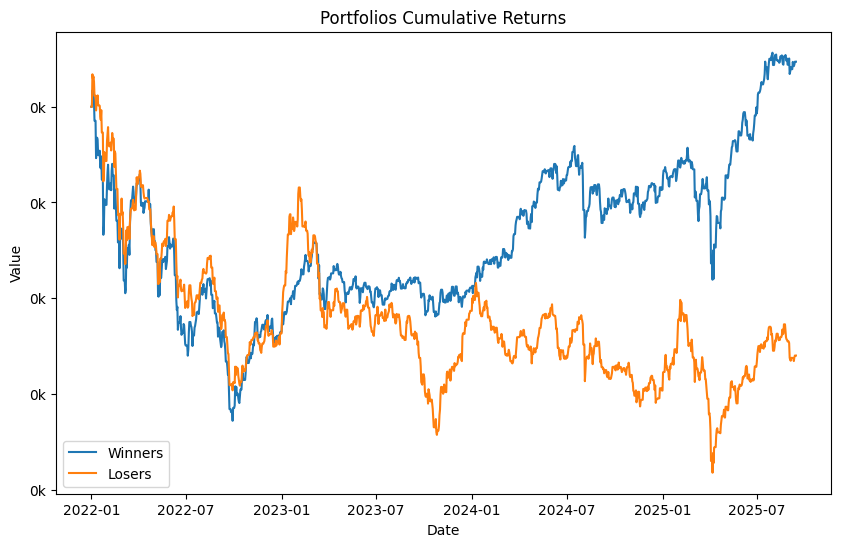

In [41]:
dff = pd.DataFrame(portfolio_returns)[["Winners", "Losers"]]

# Fonction pour formater les valeurs en "k"
def thousands(x, pos):
    return f'{int(x/1000)}k'

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer chaque stratégie
plt.plot(dff.index, dff.values, label=dff.columns)

# Titres et labels
plt.title("Portfolios Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Value")

# Formatter l'axe Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

# Légende
plt.legend()

# Afficher le graphique
plt.show()


In [42]:
# dff = pd.DataFrame(portfolio_returns)[["Winners", "Losers"]]

# fig = px.line(dff, x=dff.index, y=dff.columns,
#               title="Portfolio and Market Cumulative Returns")
# fig.show()


# d) Conclusion

SMB (Small Minus Big): Big stocks clearly outperformed small ones, generating a negative total return for this portfolio → size effect not confirmed.

HML (High Minus Low): Value stocks outperformed growth stocks, generating a positive total return for this portfolio → value effect confirmed.

WML (Winners Minus Losers): Winning stocks outperformed losing stocks, generating a positive total return for this portfolio → momentum effect confirmed.

Although the WML portfolio generated the highest total return (126%) over the three-year period, it came with extremely high volatility (283%).
For this reason, we would prefer the HML strategy, which generated slightly lower returns (88%) but with much lower volatility (28%). Moreover, it is the only portfolio with a positive Sharpe ratio (0.86).

# 8. Comparison with the US

In [85]:
df_US_momentum = pd.read_csv(r"data\F-F_Momentum_Factor_daily.csv", skiprows=13, index_col=0, parse_dates=True)
df_US_momentum.dropna(inplace=True)
df_US_3_factors = pd.read_csv(r"data\F-F_Research_Data_Factors_daily.csv", skiprows=4, index_col=0, parse_dates=True)
df_US_3_factors.dropna(inplace=True)

df_US_factors = pd.concat([df_US_3_factors[["Mkt-RF", "SMB", "HML"]], df_US_momentum], axis=1)
df_US_factors.index = pd.to_datetime(df_US_factors.index)
df_US_factors = df_US_factors[df_US_factors.index >= rebalancing_dates[0]].copy()

df_final.rename(columns={"^STOXX": "Mkt-RF", "WML": "Mom"}, inplace=True)
df_final = df_final[df_final.index <= df_US_factors.index.max()].copy()

df_US_factors = df_US_factors.reindex(df_final.index).fillna(0)
df_US_factors_returns = ((df_US_factors / 100) + 1).cumprod()
df_US_factors_returns

Mkt-RF       SMB       HML       Mom
2022-01-01  1.000000  1.000000  1.000000  1.000000
2022-01-02  1.000000  1.000000  1.000000  1.000000
2022-01-03  1.007200  1.003500  1.007700  0.989300
2022-01-04  1.004481  0.995372  1.044380  0.993653
2022-01-05  0.981779  0.980839  1.071325  0.986896
...              ...       ...       ...       ...
2025-06-26  1.161989  0.763218  1.070819  1.255275
2025-06-27  1.167334  0.761616  1.070819  1.260798
2025-06-28  1.167334  0.761616  1.070819  1.260798
2025-06-29  1.167334  0.761616  1.070819  1.260798
2025-06-30  1.173054  0.758417  1.069534  1.266724

[1280 rows x 4 columns]

In [101]:
trading_days = 252

annual_return_us = (1 + df_US_factors_returns.pct_change().mean())**trading_days - 1
annual_return_eu = (1 + df_final.pct_change().mean())**trading_days - 1

comparison_returns = pd.DataFrame({
    'US': annual_return_us,
    'EU': annual_return_eu
})
comparison_returns.round(4)


US      EU
HML     0.0207  0.0545
Mkt-RF  0.0453  0.0282
Mom     0.0584  0.0510
SMB    -0.0490 -0.0247

Entre 2022 et mi 2025, on observe que dans les deux régions (US, EU), le SMB a eu un rendement négatifs, indiquant que le size effect ne serait plus d'actualité et que les grosses capitalisations superforment désormais les small capi. Cette affirmation est d'autant plus vraie aux US qu'au EU où la différence de perf entre big et small restent plus faible.     
Le momentum et le market effect sont toujours d'actualité avec une prime plus importantes aux US qu'au EU.    
Enfin, le value effect est toujours présent mais est largement dominant au EU où la prime pour les entreprises Value comparé au Growth est plus importante au EU qu'au US

In [102]:
trading_days = 252

# Volatilité annuelle à partir des daily returns
daily_returns_us = df_US_factors_returns.pct_change().dropna()
daily_returns_eu = df_final.pct_change().dropna()

annual_vol_us = daily_returns_us.std() * (trading_days ** 0.5)
annual_vol_eu = daily_returns_eu.std() * (trading_days ** 0.5)

comparison_vol = pd.DataFrame({
    'US': annual_vol_us,
    'EU': annual_vol_eu
})
comparison_vol.round(4)


US      EU
HML     0.1207  0.0538
Mkt-RF  0.1603  0.1232
Mom     0.1422  0.0701
SMB     0.0926  0.0522

On observe globalement que les factors aux US sont plus volatiles qu'au EU où les portfolio sont plus stables.

In [94]:
# Aligner les dates communes
common_index = df_US_factors_returns.index.intersection(df_final.index)
df_us_aligned = df_US_factors_returns.loc[common_index]
df_eu_aligned = df_final.loc[common_index]

# Calculer les rendements journaliers
daily_returns_us = df_us_aligned.pct_change().dropna()
daily_returns_eu = df_eu_aligned.pct_change().dropna()

# Corrélation par facteur
corr = daily_returns_us.corrwith(daily_returns_eu)
print("Corrélation US vs EU par facteur :\n", corr)


Corrélation US vs EU par facteur :
 Mkt-RF    0.431539
SMB      -0.086568
HML       0.224999
Mom       0.213625
dtype: float64


Presque pas de correlation entre les facteurs size des deux régions    
Corrélation modéré entre les facteurs market US et EU.

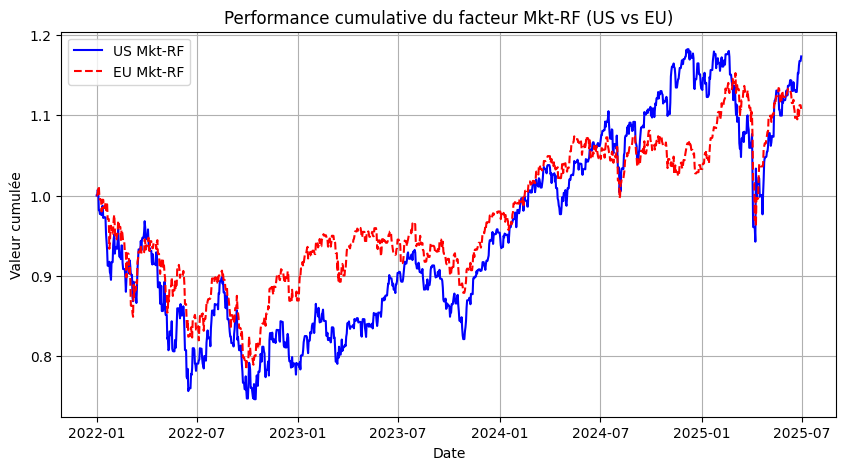

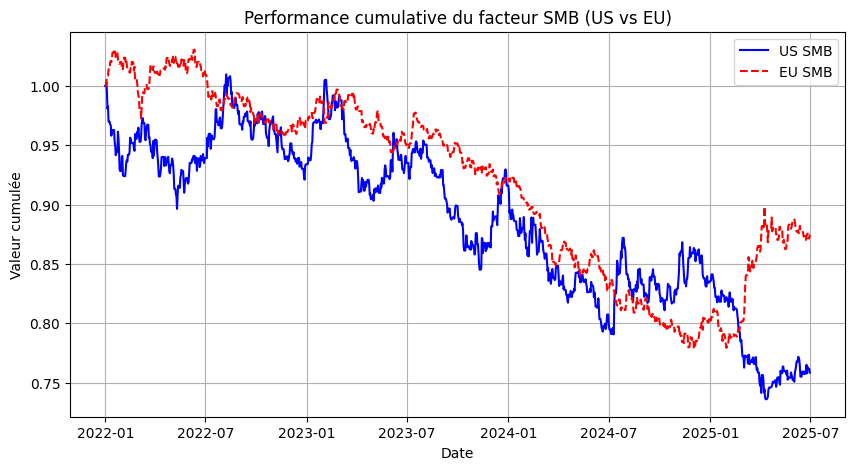

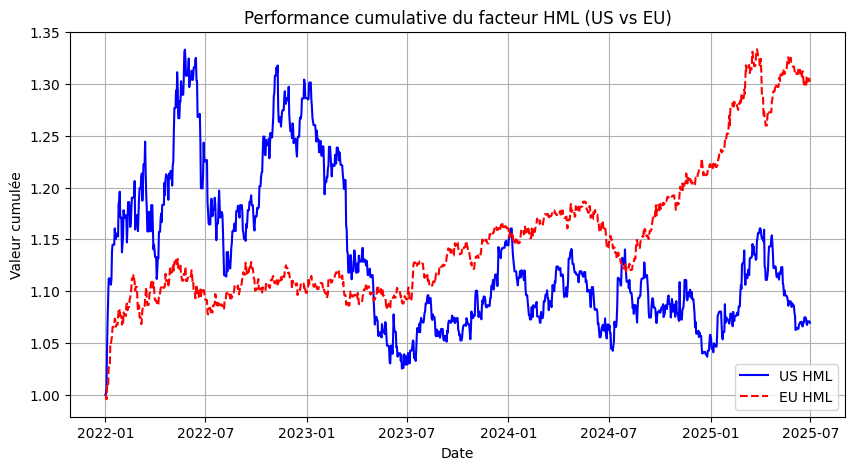

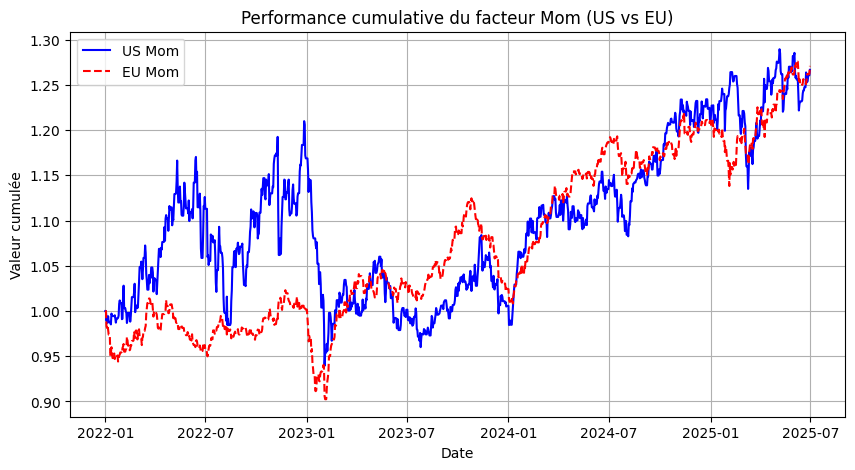

In [95]:
import matplotlib.pyplot as plt

# Aligner les dates communes
common_index = df_US_factors_returns.index.intersection(df_final.index)
df_us_aligned = df_US_factors_returns.loc[common_index]
df_eu_aligned = df_final.loc[common_index]

# Calculer la performance cumulative
cumulative_us = df_us_aligned.copy()
cumulative_eu = df_eu_aligned.copy()

# Boucle sur chaque facteur pour faire un graph
for factor in cumulative_us.columns:
    plt.figure(figsize=(10,5))
    plt.plot(cumulative_us.index, cumulative_us[factor], label=f'US {factor}', color='blue')
    plt.plot(cumulative_eu.index, cumulative_eu[factor], '--', label=f'EU {factor}', color='red')
    plt.title(f'Performance cumulative du facteur {factor} (US vs EU)')
    plt.ylabel('Valeur cumulée')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()


Au EU, on observe un regain des small capi comparé au Big en mars 2025 (plan de relance européen ?)      
Au EU, on observe un intérêt croissant pour les Value stock en juillet 2024 (dissolution assemblée France)